In [130]:
# Импортируем нужные нам библиотеки
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import numpy as np
import matplotlib.dates as mdates
import seaborn as sns
import matplotlib
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(15, 10)})
sns.set(font_scale=2)
sns.set_style("whitegrid")

In [131]:
# Загружаем датасет, с которым мы будем работать

df = pd.read_csv(r'......\bike_sharing.csv')

In [132]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,0,6,0,1,9.84,0.2879,0.81,0.0,3,13,16
1,2,1/1/2011,1,0,1,1,0,6,0,1,9.02,0.2727,0.80,0.0,8,32,40
2,3,1/1/2011,1,0,1,2,0,6,0,1,9.02,0.2727,0.80,0.0,5,27,32
3,4,1/1/2011,1,0,1,3,0,6,0,1,9.84,0.2879,0.75,0.0,3,10,13
4,5,1/1/2011,1,0,1,4,0,6,0,1,9.84,0.2879,0.75,0.0,0,1,1


In [133]:
df = df[['dteday','cnt']]

In [134]:
df['dteday']=pd.to_datetime(df['dteday'])

In [135]:
df.set_index('dteday',inplace=True)

In [136]:
df=df.resample('W').sum()

<AxesSubplot:xlabel='dteday'>

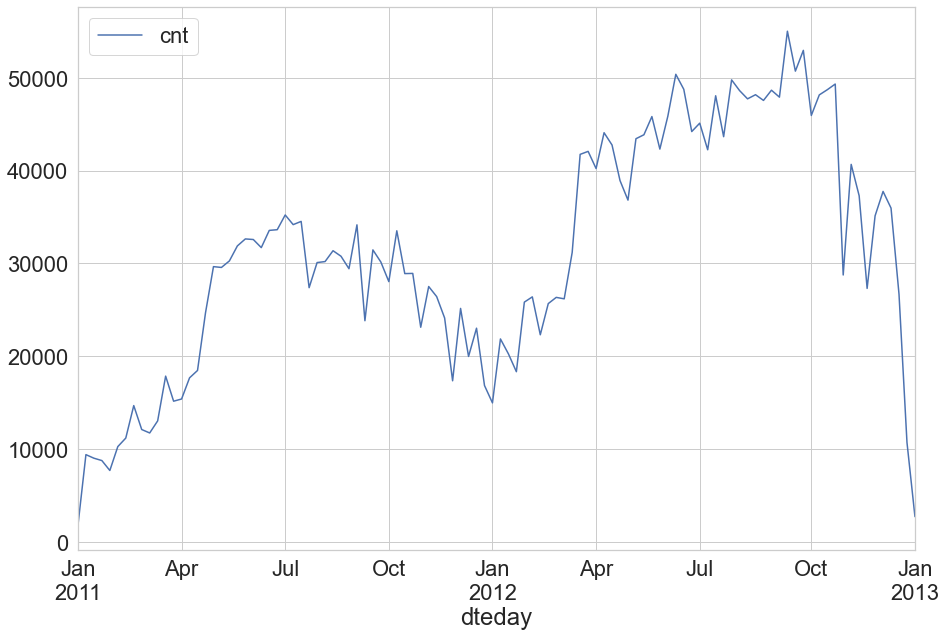

In [137]:
df.plot()

In [138]:
s = pd.Series(index = df.index,
             data= df['cnt'].values)

In [139]:
y_hat = list()
y_hat.append(np.nan)

In [140]:
for i in range(1,len(s)):
    y_hat.append(s.values[i-1])

In [141]:
s_hat = pd.Series(index=s.index,
                 data=y_hat)

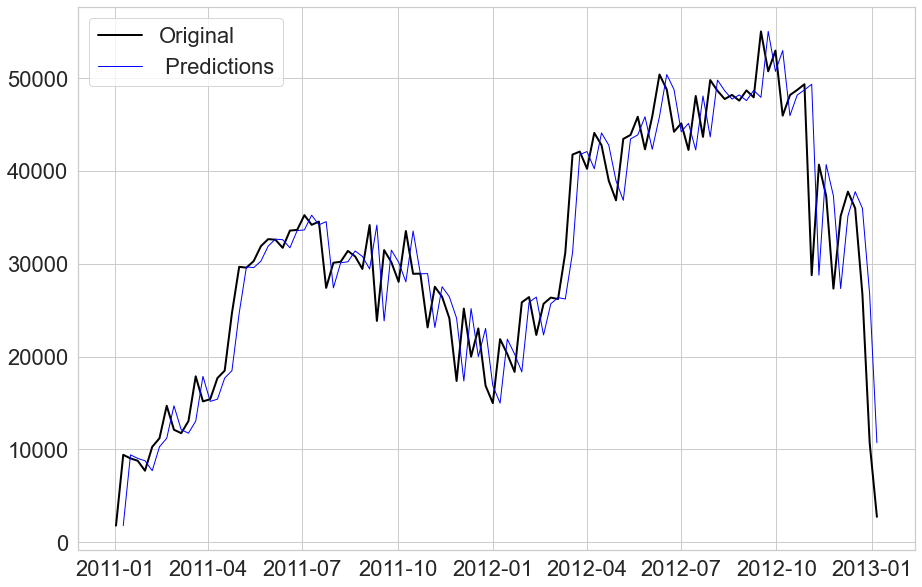

In [142]:
fig, ax = plt.subplots()
ax.plot(s, linewidth = 2, color='black',label = 'Original')
ax.plot(s_hat, linewidth = 1, color = 'blue', label =' Predictions')
ax.legend()
plt.show()


In [143]:
df['cnt_hat'] = s_hat
df.dropna(inplace=True)

In [144]:
print('MSE = ', mean_squared_error(df['cnt'],df['cnt_hat']))
print('MAE = ', mean_absolute_error(df['cnt'],df['cnt_hat']))
print('R2 = ', r2_score(df['cnt'],df['cnt_hat']))

MSE =  24431088.2
MAE =  3505.057142857143
R2 =  0.8429861806549633


In [145]:
df['residuals']= df['cnt']-df['cnt_hat']

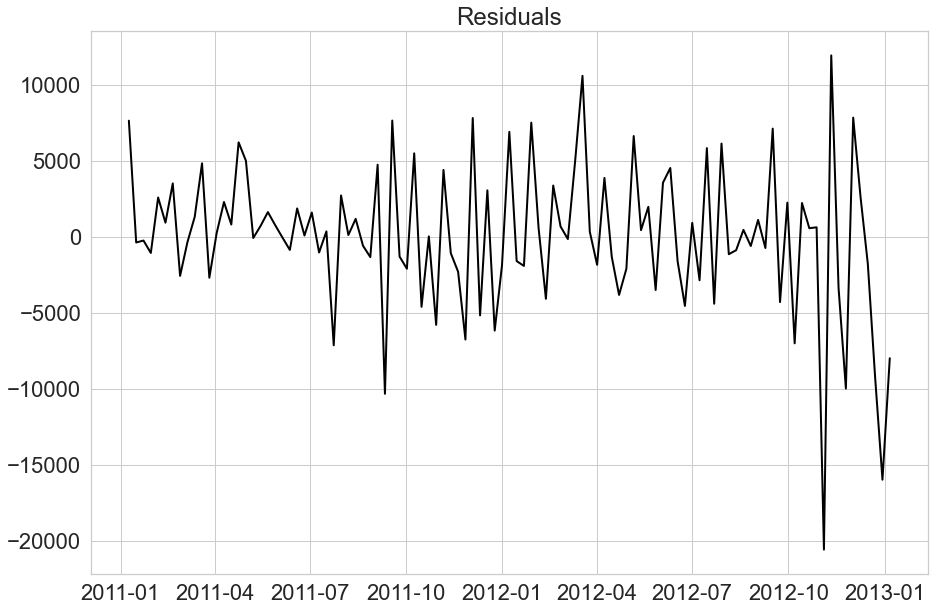

In [146]:
fig,ax = plt.subplots()

ax.plot(df['residuals'], linewidth=2,color='black')
ax.set_title('Residuals')
plt.show()


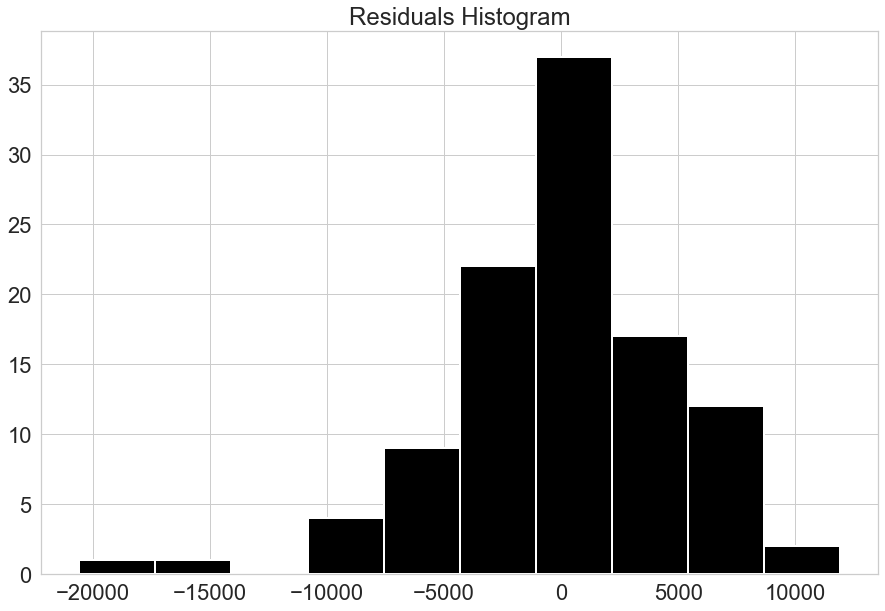

In [147]:
fig,ax = plt.subplots()

ax.hist(df['residuals'], linewidth=2,color='black')
ax.set_title('Residuals Histogram')
plt.show()

In [148]:
sigma = df['residuals'].std()

In [149]:
size = int(len(df)*0.9)
train,test = df[0:size],df[size:]

sigma = train['residuals'].std()

In [150]:
y_hat = train['cnt'].values[-1]
y_hat


48717

In [151]:
lower_bound = list()
upper_bound = list()

for i in range(len(test)):
    sigma_hat = sigma*np.sqrt(i+1)
    lower_bound.append(y_hat-sigma_hat*1.96)
    upper_bound.append(y_hat + sigma_hat*1.96)
test.loc[:,'lower_bound'] = pd.Series(lower_bound, index=test.index)
test.loc[:,'upper_bound'] = upper_bound
test.loc[:,'yhat']=y_hat

C:\Users\v.shvetsova\Anaconda3\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\v.shvetsova\Anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
C:\Users\v.shvetsova\Anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

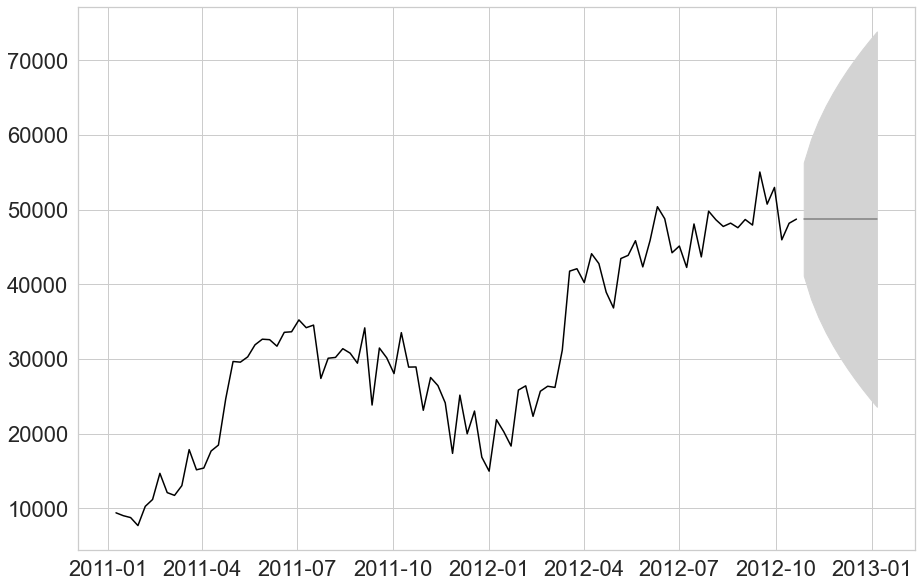

In [152]:
fig,ax = plt.subplots()
ax.plot(train['cnt'],color='black')
ax.plot(test['yhat'],color='grey')
ax.fill_between(test.index,test['upper_bound'],test['lower_bound'],color='lightgrey')
plt.show()